## Truc huynh References

### Material:
- [Pandas - Filter row and columns](https://python.plainenglish.io/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c)
- [Pandas - Drop multiple columns](https://pythonexamples.org/pandas-dataframe-delete-column/#5)
- [Pandas - Check Pandas data type](https://datascientyst.com/check-dtype-column-columns-pandas-dataframe/#:~:text=%20How%20to%20Check%20the%20Dtype%20of%20Column,Check%20if%20column%20is%20numeric%2C%20dateti...%20More%20)
- [Data - Columns Views - Original Data](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)
- [Pandas - Convert value in columns](https://stackoverflow.com/questions/52317459/python-pandas-convert-single-value-in-object-column)
- [Time Ranges/ Time Comparision](https://pythonawesome.com/time-ranges-with-python/)
- [AI BOOKS](http://aima.cs.berkeley.edu/)
- [Import docx](https://stackoverflow.com/questions/61147974/read-from-a-word-file-in-python)

- [NLP 1](https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3)

AI System CP 2.0 – Top 3 Career choices, success factor (example Sal growth, location, etc as per AI attributes)
Refer CP 1.0 Material (Project info folder in Brightspace)


## 1. Approach

- Check Nature processing Languages algorithm and approach
- Clean data & Tidy them
- Check for variable
- Check for keywords

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import json

## 2. Exploratory Data Analysis (EDA)

1. Decide if feature selection is needed.
    * Do you have hihgly correlated features?
2. Decide if you have non-scalar attributes.
3. What type of supervised learning is this?
    * Binary Classification
    * Multi-class classification?
    * Ordinal classification [Tricky]
        * Do you want to change this into regression or binarize into binary classification?
    * Regression
4. If doing classification
    1. Decide whether you class variable makes sense.
    2. Figure out what your class balance is
5. Histogram the features
    * Good if distribution is highly skewed
6. Vizualize using reduced dimensions
    * PCA, MVD
    * T-SNE

In [80]:
dfjob = pd.read_csv("./data/data.csv")

print(f"shape: {dfjob.shape}")

dfjob.head()

shape: (30, 20)


,#,jobid,country,country_code,current_url,date_posted,description,description_text,domain,job_title,location,region,company_link,company_name,job_type,company_rating,company_reviews_count,apply_link,date_posted_parsed,salary_formatted
0,1,00009f127a9e34a7,US,US,https://www.indeed.com/viewjob?jk=00009f127a9e...,22 days ago,<div>\n <p>The Treasury Analyst will assist th...,The Treasury Analyst will assist the Treasury ...,www.indeed.com,"Analyst, Treasury – Banking Retail",United States,NaN,https://www.indeed.com/cmp/The-Est%C3%A9e-Laud...,The Estée Lauder Companies,Full-time,4.0,2214.0,https://www.indeed.com/applystart?jk=00009f127...,2022-05-18T14:09:47.585Z,NaN
1,2,0001783849fce183,US,LB,https://www.indeed.com/viewjob?jk=0001783849fc...,30+ days ago,<p>At Harry’s the Store Associate / Foodservic...,At Harry’s the Store Associate / Foodservice A...,www.indeed.com,Store Associate/ Food Service Associate - Saco...,"Lebanon, ME",AS,"https://www.indeed.com/cmp/H-A-Mapes,-Inc?camp...",Harry's Convenience Stores,Part-time,NaN,NaN,NaN,NaN,From $14 an hour
2,3,00027f45e5373e13,US,US,https://www.indeed.com/viewjob?jk=00027f45e537...,30+ days ago,<div></div>\n<div>\n <div>\n <div>\n <b>ACC...,ACCENTURE's Flexible Workforce solves clients’...,www.indeed.com,Cloud Architect,United States,NaN,https://www.indeed.com/cmp/Accenture?campaigni...,Accenture,Contract,4.0,21827.0,https://www.indeed.com/applystart?jk=00027f45e...,NaN,NaN
3,4,00028cda307fcffa,US,AO,https://www.indeed.com/viewjob?jk=00028cda307f...,30+ days ago,<div>\n Company Description\n <p><b><br> Why W...,Company Description\n Why We Want You: Multi...,www.indeed.com,Maintenance Technician - $30+/hr Day Shift (El...,"Angola, IN 46703",AF,https://www.indeed.com/cmp/Techo--bloc?campaig...,Techo-Bloc,Full-time,3.1,114.0,NaN,NaN,From $30 an hour
4,5,000002c948819e54,US,AU,https://www.indeed.com/viewjob?jk=000002c94881...,30+ days ago,<div>\n <p>Working within the New York office ...,Working within the New York office the individ...,www.indeed.com,IT Senior Support Manager,"Brooklyn, NY",OC,https://www.indeed.com/cmp/Michael-Page?campai...,Michael Page,NaN,3.5,354.0,https://www.indeed.com/applystart?jk=000002c94...,NaN,NaN


## 3. Check Missing Values

In [5]:
# Set figure size
plt.rcParams["figure.figsize"]=13,11
sns.set(style='darkgrid')

<AxesSubplot:>

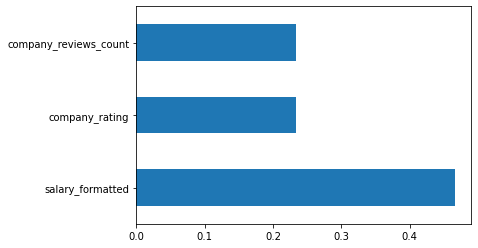

In [86]:
# Check out the missing values in percentage
missing_percentage = dfjob.isnull().sum().sort_values(ascending=False)/len(df)

missing_percentage[missing_percentage!=0].plot(kind='barh')


In [83]:
list(dfjob.columns)

['country_code',
 'description',
 'description_text',
 'job_title',
 'location',
 'company_name',
 'job_type',
 'company_rating',
 'company_reviews_count',
 'salary_formatted']

In [87]:
dfjob.drop(['#','jobid','country','apply_link','company_link','date_posted_parsed','current_url','date_posted','domain','region'],axis=1,inplace=True)

# Drop the row where the company name or link is blank:
dfjob.dropna(axis=0, how='all',subset=['company_name', 'job_type'], thresh=2, inplace=True) 

# Assume all the mssing value in salary_formated is negotiable (50% of the dataset)
dfjob['salary_formatted'] = dfjob['salary_formatted'].fillna('Negotiable')

# Fill in the rating with 0
dfjob['company_rating']=dfjob['company_rating'].fillna(0.0)

dfjob['company_reviews_count']=dfjob['company_reviews_count'].fillna(0.0)

In [89]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jacky\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jacky\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [91]:
# Clean up the resume
import re

# Clean up address, school, name, number, take only character in to the new string list
for i in range(0,len(resume_data)):
    resume_data[i] = re.sub(r'\[.*?\]', '', resume_data[i])
    word1 = " ".join(re.findall("[a-zA-Z]+", resume_data[i]))
    resume_data[i] = word1

# Using the keywords dictionary to hold all the keyword
keyword_dict = []

for line in resume_data:
    li = list(line.split(" "))
    for string_ in li:
        keyword_dict.append(string_.lower()) # Convert the string to lower

# Character that does not necessary to the search can be removed
remove_characters = ['','a','an','to','on','and','that','this','the','by','in','with','s','of','non','co','my','your','his','her','they','their','he','she','it','under']

for char in remove_characters:
    while(char in keyword_dict) :
        keyword_dict.remove(char)

# remove the repeated word in the dictionary
keyword_dict = list(dict.fromkeys(keyword_dict))

# Figure out the length of the keyword dictionaries
len(keyword_dict)

290

In [57]:
from nltk import pos_tag
from nltk.stem import PorterStemmer

pos_tag(new_data)


[('truc', 'NN'),
 ('huynh', 'NN'),
 ('experienced', 'VBD'),
 ('full', 'JJ'),
 ('stack', 'NN'),
 ('developer', 'NN'),
 ('project', 'NN'),
 ('management', 'NN'),
 ('coordination', 'NN'),
 ('through', 'IN'),
 ('different', 'JJ'),
 ('industries', 'NNS'),
 ('strong', 'JJ'),
 ('technical', 'JJ'),
 ('background', 'NN'),
 ('analyzing', 'VBG'),
 ('skills', 'NNS'),
 ('education', 'NN'),
 ('master', 'NN'),
 ('science', 'NN'),
 ('computer', 'NN'),
 ('certificate', 'NN'),
 ('data', 'NNS'),
 ('scientist', 'NN'),
 ('machine', 'NN'),
 ('learning', 'VBG'),
 ('bachelor', 'NN'),
 ('associate', 'JJ'),
 ('cyber', 'NN'),
 ('security', 'NN'),
 ('introduce', 'VBP'),
 ('self', 'NN'),
 ('driving', 'NN'),
 ('car', 'NN'),
 ('python', 'NN'),
 ('react', 'NN'),
 ('git', 'JJ'),
 ('docker', 'NN'),
 ('web', 'NN'),
 ('development', 'NN'),
 ('learn', 'VB'),
 ('proficient', 'JJ'),
 ('office', 'NN'),
 ('ms', 'NN'),
 ('visio', 'NN'),
 ('jira', 'NN'),
 ('github', 'JJ'),
 ('slack', 'NN'),
 ('experience', 'NN'),
 ('application

In [92]:
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()


# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(desc)
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

dfjob['job_description_word_set'] = dfjob['description_text'].map(prepare_job_desc)

# process the keywords
tool_keywords1_set = set([ps.stem(tok) for tok in keyword_dict]) # stem the keywords (since the job description is also stemmed.)
tool_keywords1_dict = {ps.stem(tok):tok for tok in keyword_dict} # use this dictionary to revert the stemmed words back to the original.

In [98]:
for job in dfjob['job_description_word_set']:
    for tok in job:
        print (tok,end=', ')
        
    print('')

number, work, discrep, minor, balanc, orient, servic, front, effect, 228927, microsoft, effici, encourag, ancestri, ordin, administr, state, qualifi, calcul, be, account, assist, bachelor, opportun, statement, polici, origin, mental, nation, @, research, offic, primari, sexual, relat, request, report, job, individu, approach, compani, chang, shift, perform, taken, commun, process, insight, basi, ’, critic, variou, inform, misstat, approv, profici, veteran, cash, whole, disabl, defin, reval, role, oper, payment, strong, fx, document, us-ny-melvil, gender, question, entri, 1st, fund, analyst, need, team, locat, estee.com, characterist, 4, feder, senior, bring, financi, gac, year, qualif, race, prior, financ, employ, law, ledger, month-end, medic, open, condit, event, environ, back-up, wire, requir, control, women, key, knowledg, impact, local, desk, 3, interact, protect, time, activ, end, record, childbirth, support, rate, accuraci, quarterli, skill, treasuri, schedul, pregnanc, month, r

driver, work, configur, servic, live, mileag, think, instruct, 35, core, self-reli, microsoft, clarif, satisfact, 4-week, level, ordin, qualifi, blind, self-gener, state, design, compens, five, like, driven, opportun, pursuant, polici, provid, nation, pound, relat, idea, concern, dental, request, uncap, gener, extern, you, prioriti, order, bonu, integr, individu, resourc, ambiti, compani, proof, monthli, base, uniqu, contribut, specialti, busi, commiss, valu, commun, equival, beauti, written, weekend, comfort, critic, one, in-, profici, such, vision, insur, chanc, thought, bi-weekli, space, francisco, week, consult, need, team, valid, colleg, oral, drive, shutter, 401, passion, competit, year, friendli, cultur, talent, varieti, employ, in, assign, for, medic, high-, environ, lead, requir, most, cost, entrepreneuri, outsid, confid, problem, san, 3, time, tool, record, avail, window, lucr, sell, home, how, skill, plan, understand, packag, benefit, schedul, outlin, reward, 2-5, meet, spec

work, innov, cloud-bas, 5, proven, way, lunch, qa, develop, size, satisfact, power, administr, discuss, design, salari, life, opportun, bachelor, script, insati, provid, technic, criteria, a, offic, skillset, birthday, case, glassdoor, relat, experienc, request, enthusiast, dental, gener, scienc, extern, 5+, analysi, individu, appreci, curat, compani, star, approach, mani, contribut, famili, busi, and/or, except, commun, equival, process, written, high-energi, energet, insight, first-to-market, inform, ’, featur, variou, one, workday, such, vision, defin, disabl, insur, becht, 3+, strong, document, reli, tradit, implement, go-kart, divers, collections/volunt, consult, analyst, need, team, valid, locat, flow, brainstorm, small, comput, decis, drive, 401, passion, stori, competit, refin, year, qualif, prior, session, varieti, employ, room, engag, deploy, medic, enhanc, event, environ, requir, firm, nimbl, most, basebal, entrepreneuri, isn, write, facilit, knowledg, problem, family-own, p